In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
os.chdir('F:\Python\Projects\laundering-detection')

In [3]:
df = pd.read_csv('HI-Small_Trans.csv')

In [4]:
curr_count = pd.DataFrame(df.groupby('Receiving Currency')['Receiving Currency'].agg('count'))
curr_count = curr_count.rename({'Receiving Currency': 'freq_of_curr'}, axis=1)
curr_count.sort_values(by='freq_of_curr', ascending=False)

freq_of_curr
Receiving Currency              
US Dollar                1879341
Euro                     1172017
Swiss Franc               237884
Yuan                      206551
Shekel                    194988
Rupee                     192065
UK Pound                  181255
Ruble                     157361
Yen                       156319
Bitcoin                   148151
Canadian Dollar           141357
Australian Dollar         138511
Mexican Peso              111030
Saudi Riyal                89971
Brazil Real                71544

In [5]:
df.isna().sum()

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64

In [6]:
df

Timestamp  From Bank    Account  To Bank  Account.1  \
0        2022/09/01 00:20         10  8000EBD30       10  8000EBD30   
1        2022/09/01 00:20       3208  8000F4580        1  8000F5340   
2        2022/09/01 00:00       3209  8000F4670     3209  8000F4670   
3        2022/09/01 00:02         12  8000F5030       12  8000F5030   
4        2022/09/01 00:06         10  8000F5200       10  8000F5200   
...                   ...        ...        ...      ...        ...   
5078340  2022/09/10 23:57      54219  8148A6631   256398  8148A8711   
5078341  2022/09/10 23:35         15  8148A8671   256398  8148A8711   
5078342  2022/09/10 23:52     154365  8148A6771   256398  8148A8711   
5078343  2022/09/10 23:46     256398  8148A6311   256398  8148A8711   
5078344  2022/09/10 23:37     154518  8148A6091   256398  8148A8711   

         Amount Received Receiving Currency   Amount Paid Payment Currency  \
0            3697.340000          US Dollar   3697.340000        US Dollar   
1               0.010000          US Dollar      0.010000        US Dollar   
2           14675.570000          US Dollar  14675.570000        US Dollar   
3            2806.970000          US Dollar   2806.970000        US Dollar   
4           36682.970000          US Dollar  36682.970000        US Dollar   
...                  ...                ...           ...              ...   
5078340         0.154978            Bitcoin      0.154978          Bitcoin   
5078341         0.108128            Bitcoin      0.108128          Bitcoin   
5078342         0.004988            Bitcoin      0.004988          Bitcoin   
5078343         0.038417            Bitcoin      0.038417          Bitcoin   
5078344         0.281983            Bitcoin      0.281983          Bitcoin   

        Payment Format  Is Laundering  
0         Reinvestment              0  
1               Cheque              0  
2         Reinvestment              0  
3         Reinvestment              0  
4         Reinvestment              0  
...                ...            ...  
5078340        Bitcoin              0  
5078341        Bitcoin              0  
5078342        Bitcoin              0  
5078343        Bitcoin              0  
5078344        Bitcoin              0  

[5078345 rows x 11 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078345 entries, 0 to 5078344
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Timestamp           object 
 1   From Bank           int64  
 2   Account             object 
 3   To Bank             int64  
 4   Account.1           object 
 5   Amount Received     float64
 6   Receiving Currency  object 
 7   Amount Paid         float64
 8   Payment Currency    object 
 9   Payment Format      object 
 10  Is Laundering       int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 426.2+ MB


In [8]:
df.columns = pd.Series(df.columns).apply(lambda x: x.lower())

In [9]:
df

timestamp  from bank    account  to bank  account.1  \
0        2022/09/01 00:20         10  8000EBD30       10  8000EBD30   
1        2022/09/01 00:20       3208  8000F4580        1  8000F5340   
2        2022/09/01 00:00       3209  8000F4670     3209  8000F4670   
3        2022/09/01 00:02         12  8000F5030       12  8000F5030   
4        2022/09/01 00:06         10  8000F5200       10  8000F5200   
...                   ...        ...        ...      ...        ...   
5078340  2022/09/10 23:57      54219  8148A6631   256398  8148A8711   
5078341  2022/09/10 23:35         15  8148A8671   256398  8148A8711   
5078342  2022/09/10 23:52     154365  8148A6771   256398  8148A8711   
5078343  2022/09/10 23:46     256398  8148A6311   256398  8148A8711   
5078344  2022/09/10 23:37     154518  8148A6091   256398  8148A8711   

         amount received receiving currency   amount paid payment currency  \
0            3697.340000          US Dollar   3697.340000        US Dollar   
1               0.010000          US Dollar      0.010000        US Dollar   
2           14675.570000          US Dollar  14675.570000        US Dollar   
3            2806.970000          US Dollar   2806.970000        US Dollar   
4           36682.970000          US Dollar  36682.970000        US Dollar   
...                  ...                ...           ...              ...   
5078340         0.154978            Bitcoin      0.154978          Bitcoin   
5078341         0.108128            Bitcoin      0.108128          Bitcoin   
5078342         0.004988            Bitcoin      0.004988          Bitcoin   
5078343         0.038417            Bitcoin      0.038417          Bitcoin   
5078344         0.281983            Bitcoin      0.281983          Bitcoin   

        payment format  is laundering  
0         Reinvestment              0  
1               Cheque              0  
2         Reinvestment              0  
3         Reinvestment              0  
4         Reinvestment              0  
...                ...            ...  
5078340        Bitcoin              0  
5078341        Bitcoin              0  
5078342        Bitcoin              0  
5078343        Bitcoin              0  
5078344        Bitcoin              0  

[5078345 rows x 11 columns]

In [10]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [11]:
df[['from bank', 'to bank']] = df[['from bank', 'to bank']].astype('string')

In [12]:
df

timestamp from bank    account to bank  account.1  \
0       2022-09-01 00:20:00        10  8000EBD30      10  8000EBD30   
1       2022-09-01 00:20:00      3208  8000F4580       1  8000F5340   
2       2022-09-01 00:00:00      3209  8000F4670    3209  8000F4670   
3       2022-09-01 00:02:00        12  8000F5030      12  8000F5030   
4       2022-09-01 00:06:00        10  8000F5200      10  8000F5200   
...                     ...       ...        ...     ...        ...   
5078340 2022-09-10 23:57:00     54219  8148A6631  256398  8148A8711   
5078341 2022-09-10 23:35:00        15  8148A8671  256398  8148A8711   
5078342 2022-09-10 23:52:00    154365  8148A6771  256398  8148A8711   
5078343 2022-09-10 23:46:00    256398  8148A6311  256398  8148A8711   
5078344 2022-09-10 23:37:00    154518  8148A6091  256398  8148A8711   

         amount received receiving currency   amount paid payment currency  \
0            3697.340000          US Dollar   3697.340000        US Dollar   
1               0.010000          US Dollar      0.010000        US Dollar   
2           14675.570000          US Dollar  14675.570000        US Dollar   
3            2806.970000          US Dollar   2806.970000        US Dollar   
4           36682.970000          US Dollar  36682.970000        US Dollar   
...                  ...                ...           ...              ...   
5078340         0.154978            Bitcoin      0.154978          Bitcoin   
5078341         0.108128            Bitcoin      0.108128          Bitcoin   
5078342         0.004988            Bitcoin      0.004988          Bitcoin   
5078343         0.038417            Bitcoin      0.038417          Bitcoin   
5078344         0.281983            Bitcoin      0.281983          Bitcoin   

        payment format  is laundering  
0         Reinvestment              0  
1               Cheque              0  
2         Reinvestment              0  
3         Reinvestment              0  
4         Reinvestment              0  
...                ...            ...  
5078340        Bitcoin              0  
5078341        Bitcoin              0  
5078342        Bitcoin              0  
5078343        Bitcoin              0  
5078344        Bitcoin              0  

[5078345 rows x 11 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078345 entries, 0 to 5078344
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   timestamp           datetime64[ns]
 1   from bank           string        
 2   account             object        
 3   to bank             string        
 4   account.1           object        
 5   amount received     float64       
 6   receiving currency  object        
 7   amount paid         float64       
 8   payment currency    object        
 9   payment format      object        
 10  is laundering       int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(5), string(2)
memory usage: 426.2+ MB


In [14]:
def curr_to_dollar(val, curr):
    exchange_rates = [('Australian Dollar', 0.67),
                     ('Yuan', 0.15),
                     ('US Dollar', 1),
                     ('Euro', 1.08),
                     ('Yen', 0.0076),
                     ('Rupee', 0.012),
                     ('UK Pound', 1.22),
                     ('Saudi Riyal', 0.27),
                     ('Ruble', 0.013),
                     ('Canadian Dollar', 0.72),
                     ('Swiss Franc', 1.09),
                     ('Bitcoin', 27455.80),
                     ('Mexican Peso', 0.054),
                     ('Shekel', 0.28),
                     ('Brazil Real', 0.19)]
    for currency in exchange_rates:
        if curr == currency[0]:
            usd_val = val * currency[1]
            return usd_val

In [15]:
# In order to make analysis more objective and easier I'm going to add two columns with currencies converted to USD
usd_received = []
usd_payed = []
for r in tqdm(df.itertuples()):
    usd_val_received = curr_to_dollar(r[6], r[7])
    usd_val_payed = curr_to_dollar(r[8], r[9])
    usd_received.append(usd_val_received)
    usd_payed.append(usd_val_payed)
df['received_in_usd'] = usd_received
df['paid_in_usd'] = usd_payed

5078345it [00:39, 128595.55it/s]


In [16]:
df

timestamp from bank    account to bank  account.1  \
0       2022-09-01 00:20:00        10  8000EBD30      10  8000EBD30   
1       2022-09-01 00:20:00      3208  8000F4580       1  8000F5340   
2       2022-09-01 00:00:00      3209  8000F4670    3209  8000F4670   
3       2022-09-01 00:02:00        12  8000F5030      12  8000F5030   
4       2022-09-01 00:06:00        10  8000F5200      10  8000F5200   
...                     ...       ...        ...     ...        ...   
5078340 2022-09-10 23:57:00     54219  8148A6631  256398  8148A8711   
5078341 2022-09-10 23:35:00        15  8148A8671  256398  8148A8711   
5078342 2022-09-10 23:52:00    154365  8148A6771  256398  8148A8711   
5078343 2022-09-10 23:46:00    256398  8148A6311  256398  8148A8711   
5078344 2022-09-10 23:37:00    154518  8148A6091  256398  8148A8711   

         amount received receiving currency   amount paid payment currency  \
0            3697.340000          US Dollar   3697.340000        US Dollar   
1               0.010000          US Dollar      0.010000        US Dollar   
2           14675.570000          US Dollar  14675.570000        US Dollar   
3            2806.970000          US Dollar   2806.970000        US Dollar   
4           36682.970000          US Dollar  36682.970000        US Dollar   
...                  ...                ...           ...              ...   
5078340         0.154978            Bitcoin      0.154978          Bitcoin   
5078341         0.108128            Bitcoin      0.108128          Bitcoin   
5078342         0.004988            Bitcoin      0.004988          Bitcoin   
5078343         0.038417            Bitcoin      0.038417          Bitcoin   
5078344         0.281983            Bitcoin      0.281983          Bitcoin   

        payment format  is laundering  received_in_usd   paid_in_usd  
0         Reinvestment              0      3697.340000   3697.340000  
1               Cheque              0         0.010000      0.010000  
2         Reinvestment              0     14675.570000  14675.570000  
3         Reinvestment              0      2806.970000   2806.970000  
4         Reinvestment              0     36682.970000  36682.970000  
...                ...            ...              ...           ...  
5078340        Bitcoin              0      4255.044972   4255.044972  
5078341        Bitcoin              0      2968.740742   2968.740742  
5078342        Bitcoin              0       136.949530    136.949530  
5078343        Bitcoin              0      1054.769469   1054.769469  
5078344        Bitcoin              0      7742.068851   7742.068851  

[5078345 rows x 13 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078345 entries, 0 to 5078344
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   timestamp           datetime64[ns]
 1   from bank           string        
 2   account             object        
 3   to bank             string        
 4   account.1           object        
 5   amount received     float64       
 6   receiving currency  object        
 7   amount paid         float64       
 8   payment currency    object        
 9   payment format      object        
 10  is laundering       int64         
 11  received_in_usd     float64       
 12  paid_in_usd         float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5), string(2)
memory usage: 503.7+ MB


In [18]:
df[['received_in_usd', 'paid_in_usd']] = df[['received_in_usd', 'paid_in_usd']].astype('float32')

In [19]:
df = df.sort_values(by='timestamp')
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [20]:
df

timestamp from bank    account to bank  account.1  \
0       2022-09-01 00:00:00       121  8123FB9B0     121  8123FB9B0   
1       2022-09-01 00:00:00     25170  8095AF7C0   25170  8095AF7C0   
2       2022-09-01 00:00:00     25665  809A7D4B0   24779  809189BA0   
3       2022-09-01 00:00:00     32317  800D4E490   12004  800D4E750   
4       2022-09-01 00:00:00      1024  800C8D9D0    1024  800C8D9D0   
...                     ...       ...        ...     ...        ...   
5078340 2022-09-18 10:02:00      9371  8043A0FB0   16163  802F78670   
5078341 2022-09-18 11:18:00      9371  8043A0FB0    9371  8043A0FB0   
5078342 2022-09-18 11:18:00      9371  8043A0FB0   13858  8095526B0   
5078343 2022-09-18 12:58:00      9371  8043A0FB0    1124  8026687E0   
5078344 2022-09-18 16:18:00      9371  8043A0FB0    4503  809320130   

         amount received receiving currency  amount paid payment currency  \
0                  47.64        Saudi Riyal        47.64      Saudi Riyal   
1                3917.42    Canadian Dollar      3917.42  Canadian Dollar   
2                  97.49    Canadian Dollar        97.49  Canadian Dollar   
3               13939.05               Euro     13939.05             Euro   
4                  10.37               Euro        10.37             Euro   
...                  ...                ...          ...              ...   
5078340          3749.14          US Dollar      3749.14        US Dollar   
5078341          1785.27               Euro      2091.95        US Dollar   
5078342          1785.27               Euro      1785.27             Euro   
5078343          2154.54          US Dollar      2154.54        US Dollar   
5078344          5448.55          US Dollar      5448.55        US Dollar   

        payment format  is laundering  received_in_usd   paid_in_usd  
0         Reinvestment              0        12.862800     12.862800  
1         Reinvestment              0      2820.542480   2820.542480  
2          Credit Card              0        70.192802     70.192802  
3                 Wire              0     15054.173828  15054.173828  
4         Reinvestment              0        11.199600     11.199600  
...                ...            ...              ...           ...  
5078340            ACH              1      3749.139893   3749.139893  
5078341            ACH              0      1928.091553   2091.949951  
5078342            ACH              1      1928.091553   1928.091553  
5078343            ACH              1      2154.540039   2154.540039  
5078344            ACH              1      5448.549805   5448.549805  

[5078345 rows x 13 columns]

In [21]:
df.to_parquet('cleaned_data.parquet', index=False)

## Data understanding. In this part I'm going to do some EDA and plot everything I am interested in

In [22]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [23]:
print(f'There is {(len(df[df["is laundering"] == 1]) / len(df)) * 100}% of laundering transactions in dataset')

There is 0.10194266045335636% of laundering transactions in dataset


In [24]:
from scipy import stats
stats.ttest_ind(np.log(df['received_in_usd']), np.log(df['paid_in_usd']))

Ttest_indResult(statistic=0.08581244793602283, pvalue=0.9316155126515888)

In [25]:
df.describe()
# There is some extreme values in the data

amount received       amount paid  is laundering  received_in_usd  \
count       5078345.000       5078345.000    5078345.000      5078345.000   
mean        5988726.070       4509273.368          0.001       348939.375   
std      1037183108.892     869772830.920          0.032     24103154.000   
min               0.000             0.000          0.000            0.000   
25%             183.370           184.480          0.000          155.940   
50%            1411.010          1414.540          0.000          884.304   
75%           12346.270         12297.840          0.000         5278.101   
max   1046302363293.480 1046302363293.480          1.000  28493008896.000   

          paid_in_usd  
count     5078345.000  
mean       349809.406  
std      24178126.000  
min             0.000  
25%           155.949  
50%           884.336  
75%          5278.470  
max   28493008896.000

In [26]:
from collections import Counter
def outliers_detector(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    interquartile_range = q3 - q1
    lowest = q1 - 1.5*interquartile_range
    highest = q3 + 1.5*interquartile_range
    results = np.where((data>highest) | (data<lowest), 1, 0)
    return {"Ranges": (lowest, highest), "outliers_num": Counter(results)}

In [27]:
outs = outliers_detector(df["received_in_usd"])

In [28]:
outs

{'Ranges': (-7527.300872802734, 12961.34146118164),
 'outliers_num': Counter({0: 4226135, 1: 852210})}

In [29]:
extreme_data = df[(df['received_in_usd'] < outs['Ranges'][0]) | (df['received_in_usd'] > outs['Ranges'][1])]
print(len(extreme_data))
print(len(extreme_data) / len(df))
# So from the whole dataset, there 16.7% of observations have extreme values. 
# It's possible that this data is transactions of some businesses.

852210
0.16781254522880978


In [30]:
print(df['from bank'].nunique())
print(df['to bank'].nunique())

30470
15811


In [31]:
df['receiving currency'].value_counts()

US Dollar            1879341
Euro                 1172017
Swiss Franc           237884
Yuan                  206551
Shekel                194988
Rupee                 192065
UK Pound              181255
Ruble                 157361
Yen                   156319
Bitcoin               148151
Canadian Dollar       141357
Australian Dollar     138511
Mexican Peso          111030
Saudi Riyal            89971
Brazil Real            71544
Name: receiving currency, dtype: int64

In [32]:
df.groupby(['is laundering', 'receiving currency'])['received_in_usd'].agg('mean')

is laundering  receiving currency
0              Australian Dollar       228259.062
               Bitcoin                 563502.312
               Brazil Real             895203.625
               Canadian Dollar         310203.750
               Euro                    277902.000
               Mexican Peso            372979.719
               Ruble                   868542.438
               Rupee                   575999.250
               Saudi Riyal             183816.734
               Shekel                  297744.031
               Swiss Franc             337814.688
               UK Pound                304819.312
               US Dollar               313316.000
               Yen                     373147.156
               Yuan                    258056.078
1              Australian Dollar       947756.938
               Bitcoin                  17170.234
               Brazil Real               8025.264
               Canadian Dollar      128400584.000
               E

In [33]:
df.groupby(['is laundering', 'receiving currency'])['received_in_usd'].agg('median')

is laundering  receiving currency
0              Australian Dollar     879.295
               Bitcoin              1808.459
               Brazil Real          1031.014
               Canadian Dollar       822.046
               Euro                  794.567
               Mexican Peso         1056.826
               Ruble                 960.702
               Rupee                 837.520
               Saudi Riyal           934.980
               Shekel                884.201
               Swiss Franc           854.037
               UK Pound              825.977
               US Dollar             881.720
               Yen                   792.823
               Yuan                 1010.616
1              Australian Dollar    3806.123
               Bitcoin              6805.524
               Brazil Real          4762.527
               Canadian Dollar      5399.082
               Euro                 5566.854
               Mexican Peso         6887.962
               Ruble 

In [34]:
df['payment currency'].value_counts()

US Dollar            1895172
Euro                 1168297
Swiss Franc           234860
Yuan                  213752
Shekel                192184
Rupee                 190202
UK Pound              180738
Yen                   155209
Ruble                 155178
Bitcoin               146066
Canadian Dollar       140042
Australian Dollar     136769
Mexican Peso          110159
Saudi Riyal            89014
Brazil Real            70703
Name: payment currency, dtype: int64

In [35]:
df['payment format'].value_counts()

Cheque          1864331
Credit Card     1323324
ACH              600797
Cash             490891
Reinvestment     481056
Wire             171855
Bitcoin          146091
Name: payment format, dtype: int64

In [36]:
df.groupby(['is laundering', 'payment format'])['received_in_usd'].agg('mean')

is laundering  payment format
0              ACH               842558.500
               Bitcoin           571457.562
               Cash              493848.031
               Cheque            392753.031
               Credit Card         3732.174
               Reinvestment      248505.641
               Wire              358236.844
1              ACH              5686517.500
               Bitcoin            17170.234
               Cash              274238.875
               Cheque            354560.875
               Credit Card         3035.024
Name: received_in_usd, dtype: float32

In [37]:
df.groupby(['is laundering', 'payment format'])['received_in_usd'].agg('median')

is laundering  payment format
0              ACH              1071.167
               Bitcoin          1916.854
               Cash              864.270
               Cheque           1061.039
               Credit Card       590.474
               Reinvestment     1074.005
               Wire              482.888
1              ACH              6620.880
               Bitcoin          6805.524
               Cash              602.482
               Cheque           1353.340
               Credit Card       522.433
Name: received_in_usd, dtype: float32

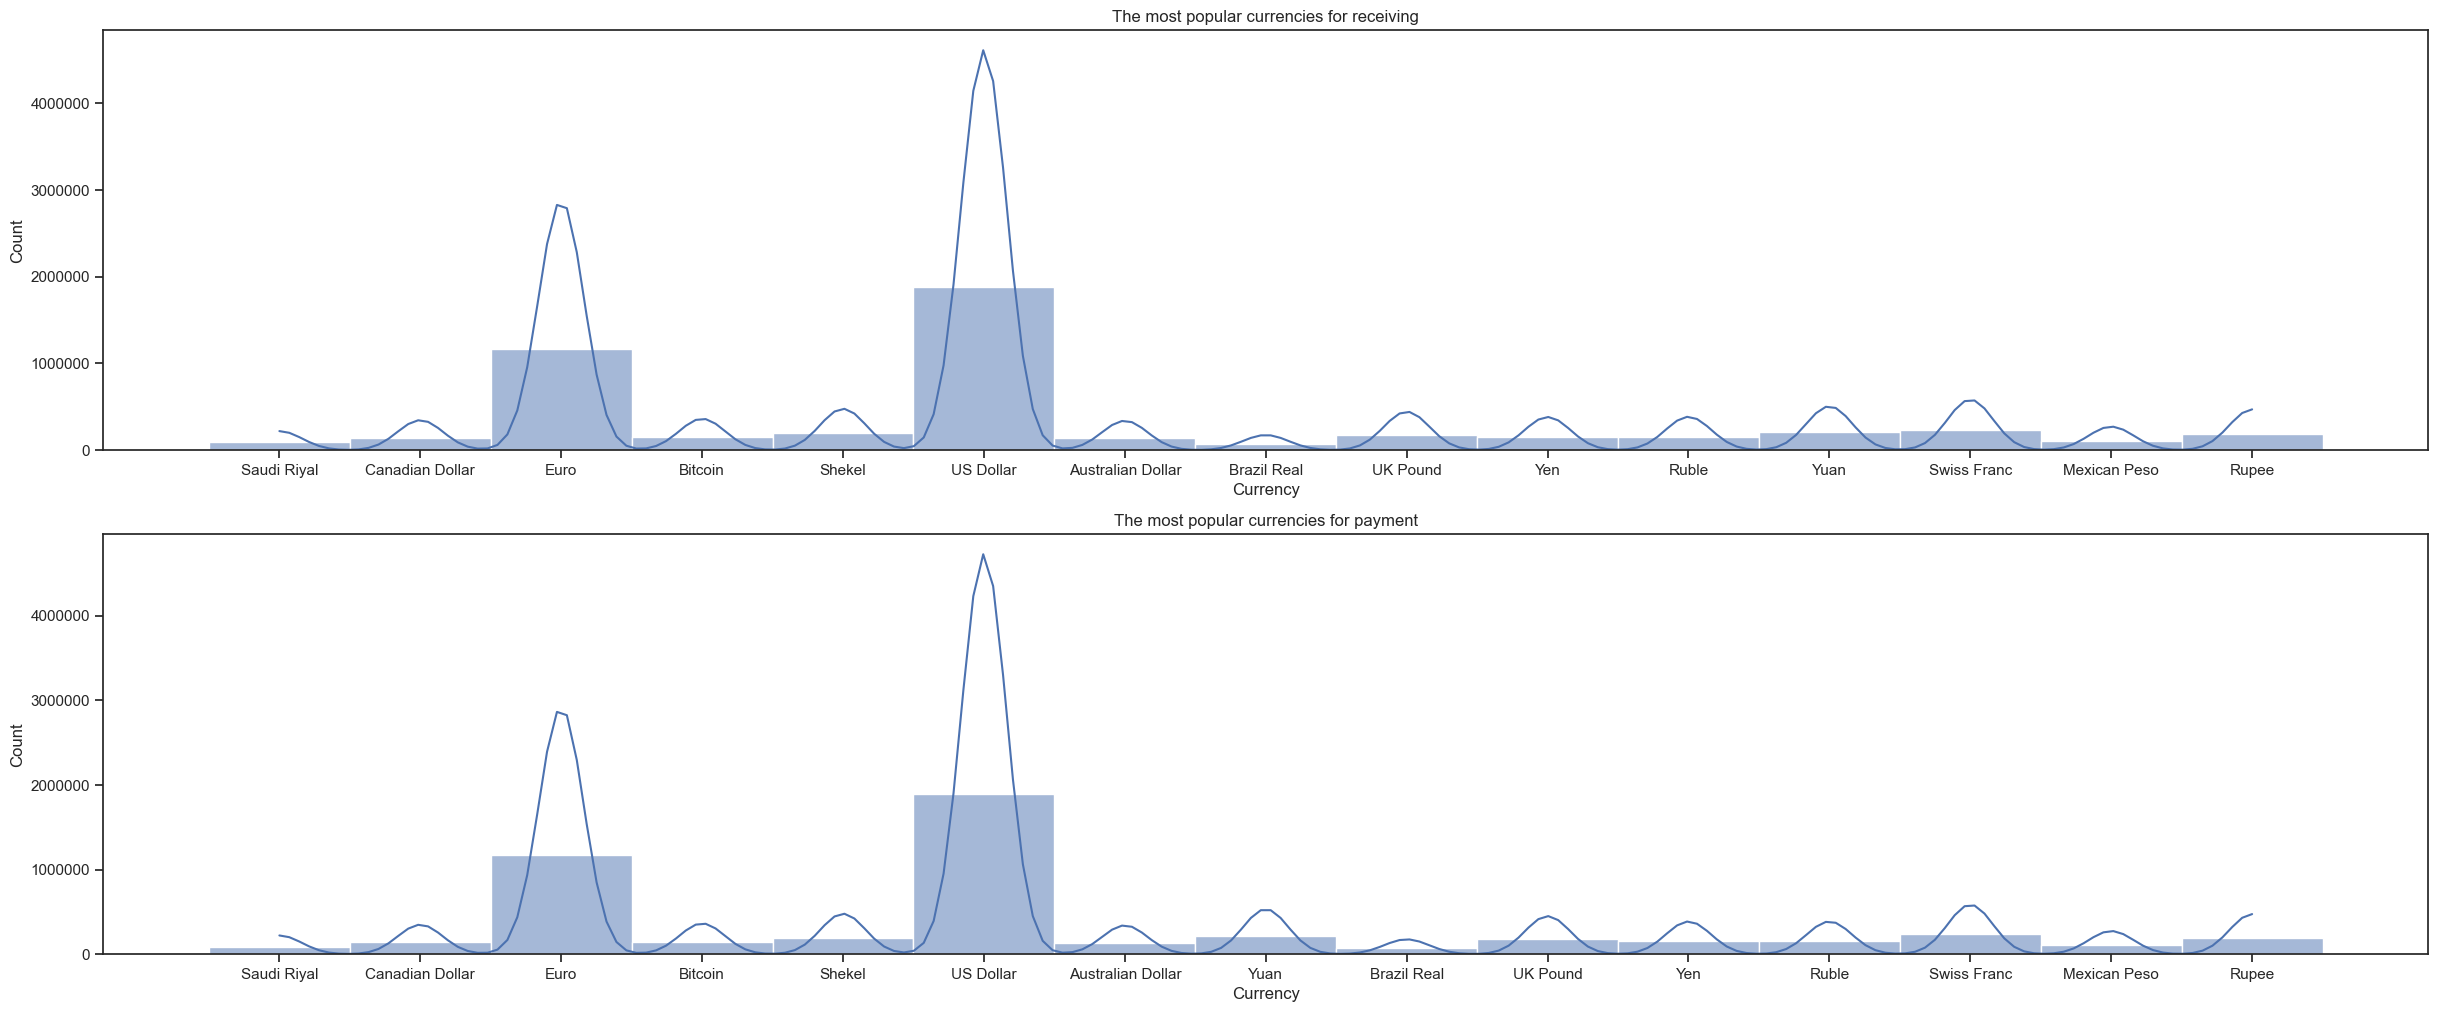

In [38]:
sns.set_theme(style="ticks")
plt.figure(figsize=(30, 12))
plt.subplot(2, 1, 1)
plt.ticklabel_format(style='plain', axis='y')
sns.histplot(data=df, x='receiving currency', kde=True)
plt.title('The most popular currencies for receiving')
plt.xlabel('Currency')
plt.subplot(2, 1, 2)
plt.ticklabel_format(style='plain', axis='y')
sns.histplot(data=df, x='payment currency', kde=True)
plt.title('The most popular currencies for payment')
plt.xlabel('Currency')
plt.show()

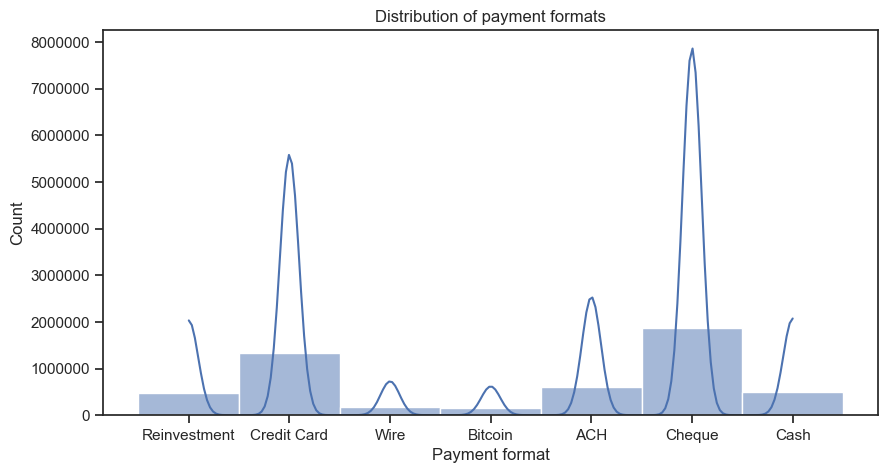

In [39]:
plt.figure(figsize=(10, 5))
plt.ticklabel_format(style='plain', axis='y')
sns.histplot(data=df, x='payment format', kde=True)
plt.xlabel('Payment format')
plt.title('Distribution of payment formats')
plt.show()

In [40]:
# I am going to divide my dataset into two parts: only laundering and only normal 
only_laun = df[df['is laundering'] == 1]
only_normal = df[df['is laundering'] == 0]

In [41]:
only_normal

timestamp from bank    account to bank  account.1  \
0       2022-09-01 00:00:00       121  8123FB9B0     121  8123FB9B0   
1       2022-09-01 00:00:00     25170  8095AF7C0   25170  8095AF7C0   
2       2022-09-01 00:00:00     25665  809A7D4B0   24779  809189BA0   
3       2022-09-01 00:00:00     32317  800D4E490   12004  800D4E750   
4       2022-09-01 00:00:00      1024  800C8D9D0    1024  800C8D9D0   
...                     ...       ...        ...     ...        ...   
5078327 2022-09-17 14:06:00     29404  8041A3440   29404  8041A3440   
5078331 2022-09-17 18:10:00      9371  8043A0FB0    9371  8043A0FB0   
5078335 2022-09-18 06:21:00     29404  8041A3440   29404  8041A3440   
5078339 2022-09-18 09:55:00     29404  8041A3440   29404  8041A3440   
5078341 2022-09-18 11:18:00      9371  8043A0FB0    9371  8043A0FB0   

         amount received receiving currency  amount paid payment currency  \
0                 47.640        Saudi Riyal       47.640      Saudi Riyal   
1               3917.420    Canadian Dollar     3917.420  Canadian Dollar   
2                 97.490    Canadian Dollar       97.490  Canadian Dollar   
3              13939.050               Euro    13939.050             Euro   
4                 10.370               Euro       10.370             Euro   
...                  ...                ...          ...              ...   
5078327         8053.240               Euro     9436.650        US Dollar   
5078331         2078.060               Euro     2435.040        US Dollar   
5078335        12376.110               Euro    14502.120        US Dollar   
5078339         2391.920        Saudi Riyal      637.660        US Dollar   
5078341         1785.270               Euro     2091.950        US Dollar   

        payment format  is laundering  received_in_usd  paid_in_usd  
0         Reinvestment              0           12.863       12.863  
1         Reinvestment              0         2820.542     2820.542  
2          Credit Card              0           70.193       70.193  
3                 Wire              0        15054.174    15054.174  
4         Reinvestment              0           11.200       11.200  
...                ...            ...              ...          ...  
5078327            ACH              0         8697.499     9436.650  
5078331            ACH              0         2244.305     2435.040  
5078335            ACH              0        13366.199    14502.120  
5078339            ACH              0          645.818      637.660  
5078341            ACH              0         1928.092     2091.950  

[5073168 rows x 13 columns]

In [42]:
only_laun

timestamp from bank    account to bank  account.1  \
17112   2022-09-01 00:01:00        70  100428660   15980  80B39E7B0   
33231   2022-09-01 00:03:00        70  100428660  113798  80DC756E0   
34782   2022-09-01 00:03:00        70  100428660   11474  805B716C0   
43470   2022-09-01 00:03:00      1467  8013C4030      20  80BC62F10   
45786   2022-09-01 00:04:00       119  811C597B0   48309  811C599A0   
...                     ...       ...        ...     ...        ...   
5078338 2022-09-18 09:55:00     29404  8041A3440     118  811A79C40   
5078340 2022-09-18 10:02:00      9371  8043A0FB0   16163  802F78670   
5078342 2022-09-18 11:18:00      9371  8043A0FB0   13858  8095526B0   
5078343 2022-09-18 12:58:00      9371  8043A0FB0    1124  8026687E0   
5078344 2022-09-18 16:18:00      9371  8043A0FB0    4503  809320130   

         amount received receiving currency  amount paid payment currency  \
17112            792.920          US Dollar      792.920        US Dollar   
33231       13171425.530          US Dollar 13171425.530        US Dollar   
34782          29024.330          US Dollar    29024.330        US Dollar   
43470          58702.100               Yuan    58702.100             Yuan   
45786          34254.650        Saudi Riyal    34254.650      Saudi Riyal   
...                  ...                ...          ...              ...   
5078338         2391.920        Saudi Riyal     2391.920      Saudi Riyal   
5078340         3749.140          US Dollar     3749.140        US Dollar   
5078342         1785.270               Euro     1785.270             Euro   
5078343         2154.540          US Dollar     2154.540        US Dollar   
5078344         5448.550          US Dollar     5448.550        US Dollar   

        payment format  is laundering  received_in_usd  paid_in_usd  
17112      Credit Card              1          792.920      792.920  
33231           Cheque              1     13171426.000 13171426.000  
34782      Credit Card              1        29024.330    29024.330  
43470              ACH              1         8805.315     8805.315  
45786              ACH              1         9248.756     9248.756  
...                ...            ...              ...          ...  
5078338            ACH              1          645.818      645.818  
5078340            ACH              1         3749.140     3749.140  
5078342            ACH              1         1928.092     1928.092  
5078343            ACH              1         2154.540     2154.540  
5078344            ACH              1         5448.550     5448.550  

[5177 rows x 13 columns]

In [43]:
only_normal.describe()

amount received       amount paid  is laundering  received_in_usd  \
count       5073168.000       5073168.000    5073168.000      5073168.000   
mean        5957962.479       4477000.044          0.000       344241.719   
std      1036563448.522     868846296.804          0.000     23067626.000   
min               0.000             0.000          0.000            0.000   
25%             183.070           184.160          0.000          155.700   
50%            1407.510          1410.990          0.000          882.170   
75%           12322.510         12279.340          0.000         5264.211   
max   1046302363293.480 1046302363293.480          0.000  28493008896.000   

          paid_in_usd  
count     5073168.000  
mean       345112.688  
std      23146034.000  
min             0.000  
25%           155.704  
50%           882.213  
75%          5264.214  
max   28493008896.000

In [44]:
only_laun.describe()

amount received     amount paid  is laundering  received_in_usd  \
count         5177.000        5177.000       5177.000         5177.000   
mean      36135310.413    36135310.413          1.000      4952431.500   
std     1527918669.798  1527918669.798          0.000    220081824.000   
min              0.003           0.003          1.000            0.356   
25%           2634.970        2634.970          1.000         2102.933   
50%           8667.210        8667.210          1.000         5840.050   
75%          18832.270       18832.270          1.000        13306.356   
max    84853144179.580 84853144179.580          1.000  15480498176.000   

          paid_in_usd  
count        5177.000  
mean      4952431.500  
std     220081824.000  
min             0.356  
25%          2102.933  
50%          5840.050  
75%         13306.356  
max   15480498176.000

In [45]:
# There is pretty much banks so I want to check only top-10 banks among banks-senders and banks-receivers
from_laun = only_laun['from bank'].value_counts().sort_values(ascending=False)[:10].keys()
to_laun = only_laun['to bank'].value_counts().sort_values(ascending=False)[:10].keys()
from_norm = only_normal['from bank'].value_counts().sort_values(ascending=False)[:10].keys()
to_norm = only_normal['to bank'].value_counts().sort_values(ascending=False)[:10].keys()

In [46]:
def bank_df(val, col, norm=False):
    if norm:
        bank_df = only_normal[only_normal[col] == val]
    else:
        bank_df = only_laun[only_laun[col] == val]
    return bank_df

In [47]:
from_Ldf = [bank_df(i, 'from bank') for i in from_laun]
from_Ldf = pd.concat(from_Ldf)
to_Ldf = [bank_df(j, 'to bank') for j in to_laun]
to_Ldf = pd.concat(to_Ldf)
from_Ndf = [bank_df(k, 'from bank', norm=True) for k in from_norm]
from_Ndf = pd.concat(from_Ndf)
to_Ndf = [bank_df(l, 'to bank', norm=True) for l in to_norm]
to_Ndf = pd.concat(to_Ndf)


In [48]:
from_Ldf

timestamp from bank    account to bank  account.1  \
17112   2022-09-01 00:01:00        70  100428660   15980  80B39E7B0   
33231   2022-09-01 00:03:00        70  100428660  113798  80DC756E0   
34782   2022-09-01 00:03:00        70  100428660   11474  805B716C0   
67948   2022-09-01 00:06:00        70  100428858       8  8090A6540   
108734  2022-09-01 00:09:00        70  100428738   10656  8044072A0   
...                     ...       ...        ...     ...        ...   
5078300 2022-09-16 12:59:00       118  811B6E170     222  811D80C30   
5078311 2022-09-17 00:03:00       118  811B6E170     223  811B9B160   
5078315 2022-09-17 05:57:00       118  811B6E170     121  8000E1590   
5078322 2022-09-17 09:39:00       118  811B6E170     119  811DCA9B0   
5078330 2022-09-17 17:23:00       118  811B6E170     118  811B6E170   

         amount received receiving currency  amount paid payment currency  \
17112            792.920          US Dollar      792.920        US Dollar   
33231       13171425.530          US Dollar 13171425.530        US Dollar   
34782          29024.330          US Dollar    29024.330        US Dollar   
67948             66.060    Canadian Dollar       66.060  Canadian Dollar   
108734      37080124.050                Yen 37080124.050              Yen   
...                  ...                ...          ...              ...   
5078300         6379.010        Saudi Riyal     6379.010      Saudi Riyal   
5078311        48801.010        Saudi Riyal    48801.010      Saudi Riyal   
5078315        40089.330        Saudi Riyal    40089.330      Saudi Riyal   
5078322        13001.020        Saudi Riyal    13001.020      Saudi Riyal   
5078330        11868.440        Saudi Riyal    11868.440      Saudi Riyal   

        payment format  is laundering  received_in_usd  paid_in_usd  
17112      Credit Card              1          792.920      792.920  
33231           Cheque              1     13171426.000 13171426.000  
34782      Credit Card              1        29024.330    29024.330  
67948             Cash              1           47.563       47.563  
108734          Cheque              1       281808.938   281808.938  
...                ...            ...              ...          ...  
5078300            ACH              1         1722.333     1722.333  
5078311            ACH              1        13176.272    13176.272  
5078315            ACH              1        10824.119    10824.119  
5078322            ACH              1         3510.275     3510.275  
5078330            ACH              1         3204.479     3204.479  

[1105 rows x 13 columns]

In [49]:
to_Ldf

timestamp from bank    account to bank  account.1  \
66096   2022-09-01 00:06:00     21174  800737690      12  80011F990   
537711  2022-09-01 06:46:00        23  8001FE5D0      12  800054B70   
842902  2022-09-01 15:53:00     11318  8011AB110      12  8011B4A60   
876305  2022-09-01 16:53:00      2591  8009DEA60      12  8009DED80   
932705  2022-09-01 18:34:00        27  80B715490      12  80B715D30   
...                     ...       ...        ...     ...        ...   
5077938 2022-09-13 05:28:00     28611  80AA89060      15  803DE4A90   
5078000 2022-09-13 11:27:00    214749  805DB7F20      15  80AD14210   
5078020 2022-09-13 12:50:00     11808  804622AD0      15  803DE4A90   
5078071 2022-09-13 17:58:00     17649  80C527330      15  803DE4A90   
5078079 2022-09-13 18:22:00     13345  80BA543E0      15  803DE4A90   

         amount received receiving currency   amount paid   payment currency  \
66096           2848.960               Euro      2848.960               Euro   
537711         18748.970          US Dollar     18748.970          US Dollar   
842902           327.520          US Dollar       327.520          US Dollar   
876305           593.650               Euro       593.650               Euro   
932705         41442.510       Mexican Peso     41442.510       Mexican Peso   
...                  ...                ...           ...                ...   
5077938    103127796.640                Yen 103127796.640                Yen   
5078000        27152.440  Australian Dollar     27152.440  Australian Dollar   
5078020      1509335.000                Yen   1509335.000                Yen   
5078071      1119152.570                Yen   1119152.570                Yen   
5078079       784535.300                Yen    784535.300                Yen   

        payment format  is laundering  received_in_usd  paid_in_usd  
66096              ACH              1         3076.877     3076.877  
537711             ACH              1        18748.971    18748.971  
842902             ACH              1          327.520      327.520  
876305             ACH              1          641.142      641.142  
932705             ACH              1         2237.896     2237.896  
...                ...            ...              ...          ...  
5077938            ACH              1       783771.250   783771.250  
5078000            ACH              1        18192.135    18192.135  
5078020            ACH              1        11470.946    11470.946  
5078071            ACH              1         8505.560     8505.560  
5078079            ACH              1         5962.468     5962.468  

[568 rows x 13 columns]

In [50]:
from_Ndf

timestamp from bank    account to bank  account.1  \
18      2022-09-01 00:00:00        70  1004286A8    1522  800C05510   
52      2022-09-01 00:00:00        70  1004286A8    1547  800DEEF30   
69      2022-09-01 00:00:00        70  1004286A8      23  8009C94C0   
96      2022-09-01 00:00:00        70  100428858  125645  809B499D0   
311     2022-09-01 00:00:00        70  100428660   10642  8147D3210   
...                     ...       ...        ...     ...        ...   
5076711 2022-09-10 23:56:00       211  807DF69F0   21174  80887A6F0   
5077013 2022-09-10 23:58:00       211  8000AF480       6  80A1B1970   
5077015 2022-09-10 23:58:00       211  807C33EB0   22091  8086909E0   
5077200 2022-09-10 23:59:00       211  8076D12E0     211  807ED94A0   
5077893 2022-09-12 19:22:00       211  80A309670     211  80A309670   

         amount received receiving currency  amount paid   payment currency  \
18              5280.290               Euro     5280.290               Euro   
52              7788.860               Euro     7788.860               Euro   
69               670.320               Euro      670.320               Euro   
96              3058.450    Canadian Dollar     3058.450    Canadian Dollar   
311             1463.340          US Dollar     1463.340          US Dollar   
...                  ...                ...          ...                ...   
5076711         2636.880          US Dollar     2636.880          US Dollar   
5077013           50.880  Australian Dollar       50.880  Australian Dollar   
5077015           76.330           UK Pound       76.330           UK Pound   
5077200          112.650           UK Pound      112.650           UK Pound   
5077893         1690.900          US Dollar     2388.900  Australian Dollar   

        payment format  is laundering  received_in_usd  paid_in_usd  
18                Cash              0         5702.713     5702.713  
52              Cheque              0         8411.969     8411.969  
69         Credit Card              0          723.946      723.946  
96         Credit Card              0         2202.084     2202.084  
311             Cheque              0         1463.340     1463.340  
...                ...            ...              ...          ...  
5076711    Credit Card              0         2636.880     2636.880  
5077013           Cash              0           34.090       34.090  
5077015    Credit Card              0           93.123       93.123  
5077200           Cash              0          137.433      137.433  
5077893            ACH              0         1690.900     1600.563  

[918344 rows x 13 columns]

In [51]:
to_Ndf

timestamp from bank    account to bank  account.1  \
694     2022-09-01 00:00:00        10  8017C89F0      10  8017C89F0   
1394    2022-09-01 00:00:00      4242  8119E7050      10  80010BBD0   
1817    2022-09-01 00:00:00      5836  81314F3A0      10  8131C71C0   
1896    2022-09-01 00:00:00      1601  8005C9020      10  801231E70   
2140    2022-09-01 00:00:00        10  801158790      10  801158790   
...                     ...       ...        ...     ...        ...   
5076613 2022-09-10 23:55:00         6  80A138450     211  80A947500   
5076710 2022-09-10 23:56:00       211  807DF69F0     211  807DF69F0   
5077200 2022-09-10 23:59:00       211  8076D12E0     211  807ED94A0   
5077215 2022-09-10 23:59:00        70  1004288A0     211  80A142150   
5077893 2022-09-12 19:22:00       211  80A309670     211  80A309670   

         amount received receiving currency  amount paid   payment currency  \
694          1270437.900          US Dollar  1270437.900          US Dollar   
1394               1.760          US Dollar        1.760          US Dollar   
1817           19948.250          US Dollar    19948.250          US Dollar   
1896             179.350          US Dollar      179.350          US Dollar   
2140        20898540.970          US Dollar 20898540.970          US Dollar   
...                  ...                ...          ...                ...   
5076613          130.090  Australian Dollar      130.090  Australian Dollar   
5076710         2636.880          US Dollar     2041.480           UK Pound   
5077200          112.650           UK Pound      112.650           UK Pound   
5077215         4225.820  Australian Dollar     4225.820  Australian Dollar   
5077893         1690.900          US Dollar     2388.900  Australian Dollar   

        payment format  is laundering  received_in_usd  paid_in_usd  
694       Reinvestment              0      1270437.875  1270437.875  
1394       Credit Card              0            1.760        1.760  
1817       Credit Card              0        19948.250    19948.250  
1896            Cheque              0          179.350      179.350  
2140      Reinvestment              0     20898540.000 20898540.000  
...                ...            ...              ...          ...  
5076613         Cheque              0           87.160       87.160  
5076710            ACH              0         2636.880     2490.606  
5077200           Cash              0          137.433      137.433  
5077215         Cheque              0         2831.299     2831.299  
5077893            ACH              0         1690.900     1600.563  

[295914 rows x 13 columns]

In [52]:
from_Ldf

timestamp from bank    account to bank  account.1  \
17112   2022-09-01 00:01:00        70  100428660   15980  80B39E7B0   
33231   2022-09-01 00:03:00        70  100428660  113798  80DC756E0   
34782   2022-09-01 00:03:00        70  100428660   11474  805B716C0   
67948   2022-09-01 00:06:00        70  100428858       8  8090A6540   
108734  2022-09-01 00:09:00        70  100428738   10656  8044072A0   
...                     ...       ...        ...     ...        ...   
5078300 2022-09-16 12:59:00       118  811B6E170     222  811D80C30   
5078311 2022-09-17 00:03:00       118  811B6E170     223  811B9B160   
5078315 2022-09-17 05:57:00       118  811B6E170     121  8000E1590   
5078322 2022-09-17 09:39:00       118  811B6E170     119  811DCA9B0   
5078330 2022-09-17 17:23:00       118  811B6E170     118  811B6E170   

         amount received receiving currency  amount paid payment currency  \
17112            792.920          US Dollar      792.920        US Dollar   
33231       13171425.530          US Dollar 13171425.530        US Dollar   
34782          29024.330          US Dollar    29024.330        US Dollar   
67948             66.060    Canadian Dollar       66.060  Canadian Dollar   
108734      37080124.050                Yen 37080124.050              Yen   
...                  ...                ...          ...              ...   
5078300         6379.010        Saudi Riyal     6379.010      Saudi Riyal   
5078311        48801.010        Saudi Riyal    48801.010      Saudi Riyal   
5078315        40089.330        Saudi Riyal    40089.330      Saudi Riyal   
5078322        13001.020        Saudi Riyal    13001.020      Saudi Riyal   
5078330        11868.440        Saudi Riyal    11868.440      Saudi Riyal   

        payment format  is laundering  received_in_usd  paid_in_usd  
17112      Credit Card              1          792.920      792.920  
33231           Cheque              1     13171426.000 13171426.000  
34782      Credit Card              1        29024.330    29024.330  
67948             Cash              1           47.563       47.563  
108734          Cheque              1       281808.938   281808.938  
...                ...            ...              ...          ...  
5078300            ACH              1         1722.333     1722.333  
5078311            ACH              1        13176.272    13176.272  
5078315            ACH              1        10824.119    10824.119  
5078322            ACH              1         3510.275     3510.275  
5078330            ACH              1         3204.479     3204.479  

[1105 rows x 13 columns]

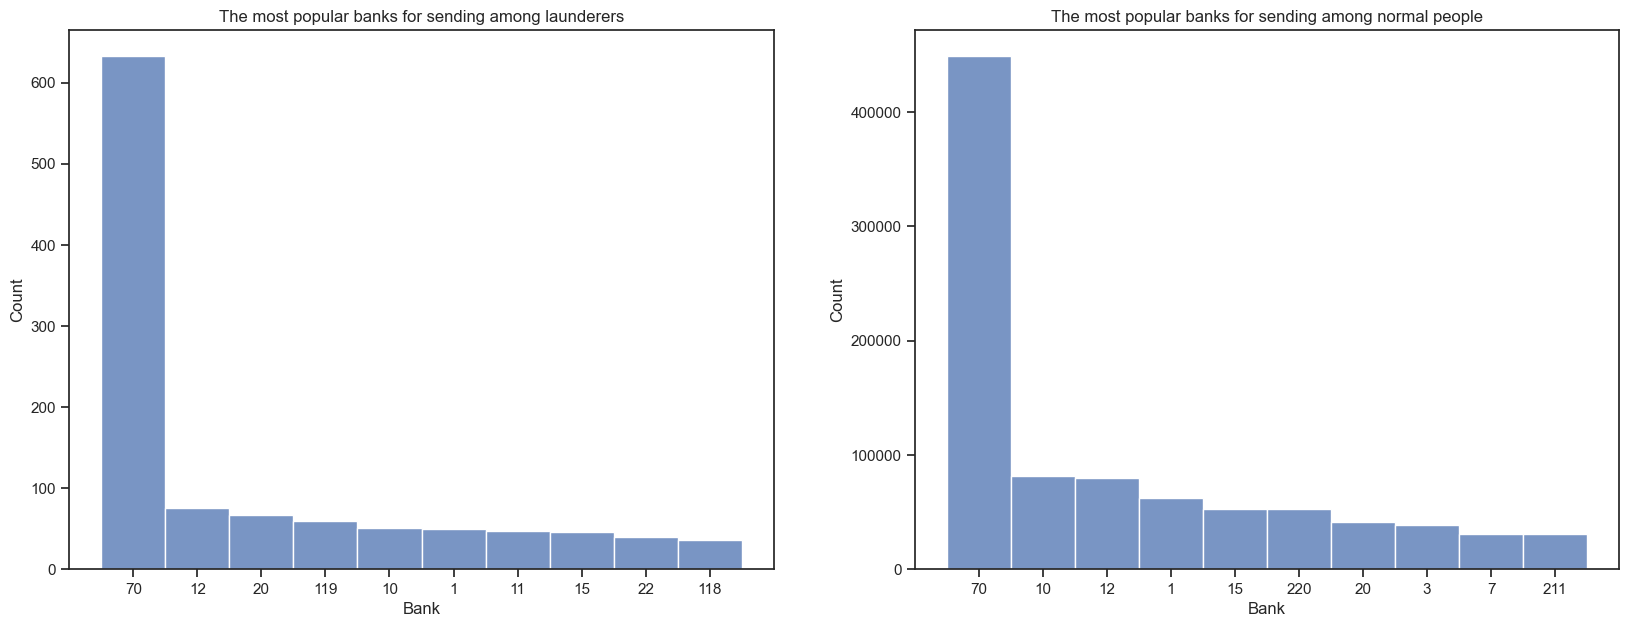

In [53]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.histplot(data=from_Ldf, x='from bank')
plt.xlabel('Bank')
plt.title('The most popular banks for sending among launderers')
plt.subplot(1, 2, 2)
sns.histplot(data=from_Ndf, x='from bank')
plt.xlabel('Bank')
plt.title('The most popular banks for sending among normal people')
plt.show()

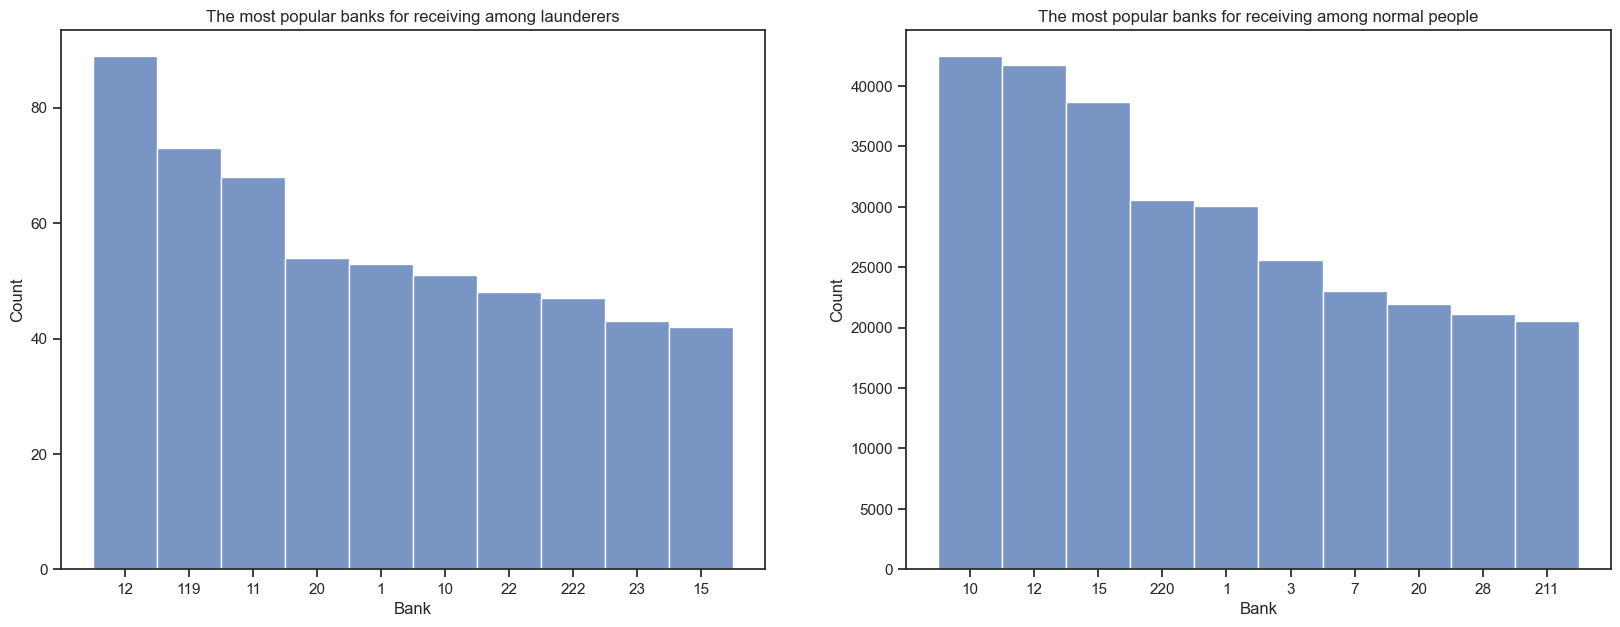

In [54]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.histplot(data=to_Ldf, x='to bank')
plt.xlabel('Bank')
plt.title('The most popular banks for receiving among launderers')
plt.subplot(1, 2, 2)
sns.histplot(data=to_Ndf, x='to bank')
plt.xlabel('Bank')
plt.title('The most popular banks for receiving among normal people')
plt.show()

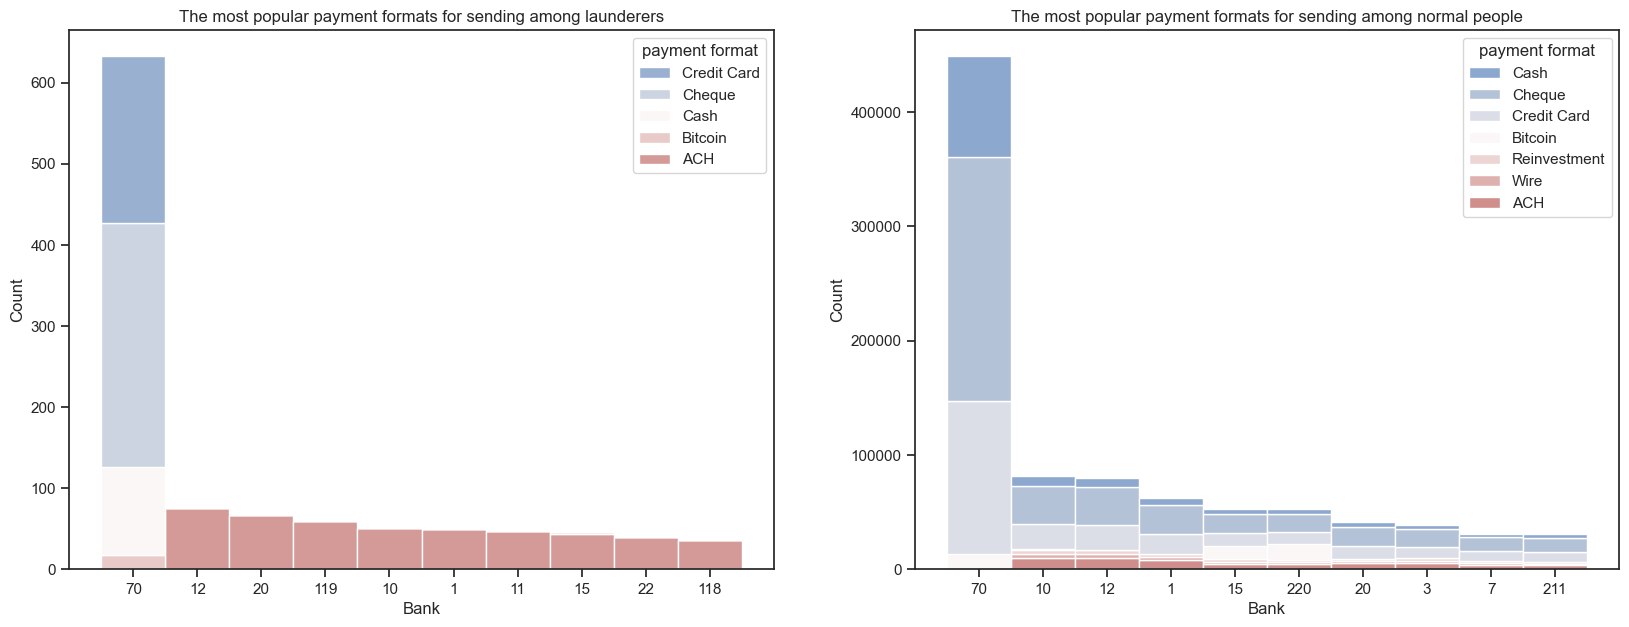

In [55]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.histplot(data=from_Ldf, x='from bank', hue='payment format', multiple='stack', palette='vlag')
plt.xlabel('Bank')
plt.title('The most popular payment formats for sending among launderers')
plt.subplot(1, 2, 2)
sns.histplot(data=from_Ndf, x='from bank', hue='payment format', multiple='stack', palette='vlag')
plt.xlabel('Bank')
plt.title('The most popular payment formats for sending among normal people')
plt.show()

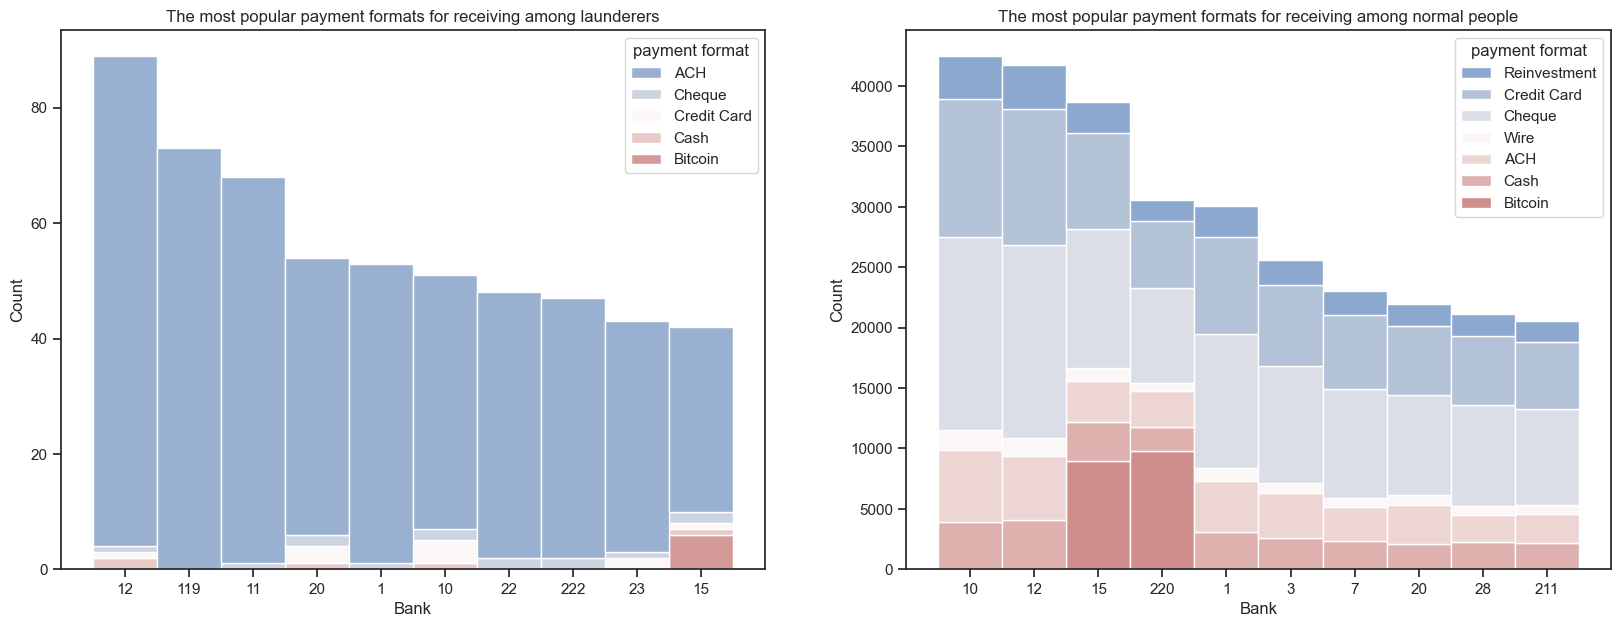

In [56]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.histplot(data=to_Ldf, x='to bank', hue='payment format', multiple='stack', palette='vlag')
plt.xlabel('Bank')
plt.title('The most popular payment formats for receiving among launderers')
plt.subplot(1, 2, 2)
sns.histplot(data=to_Ndf, x='to bank', hue='payment format', multiple='stack', palette='vlag')
plt.xlabel('Bank')
plt.title('The most popular payment formats for receiving among normal people')
plt.show()

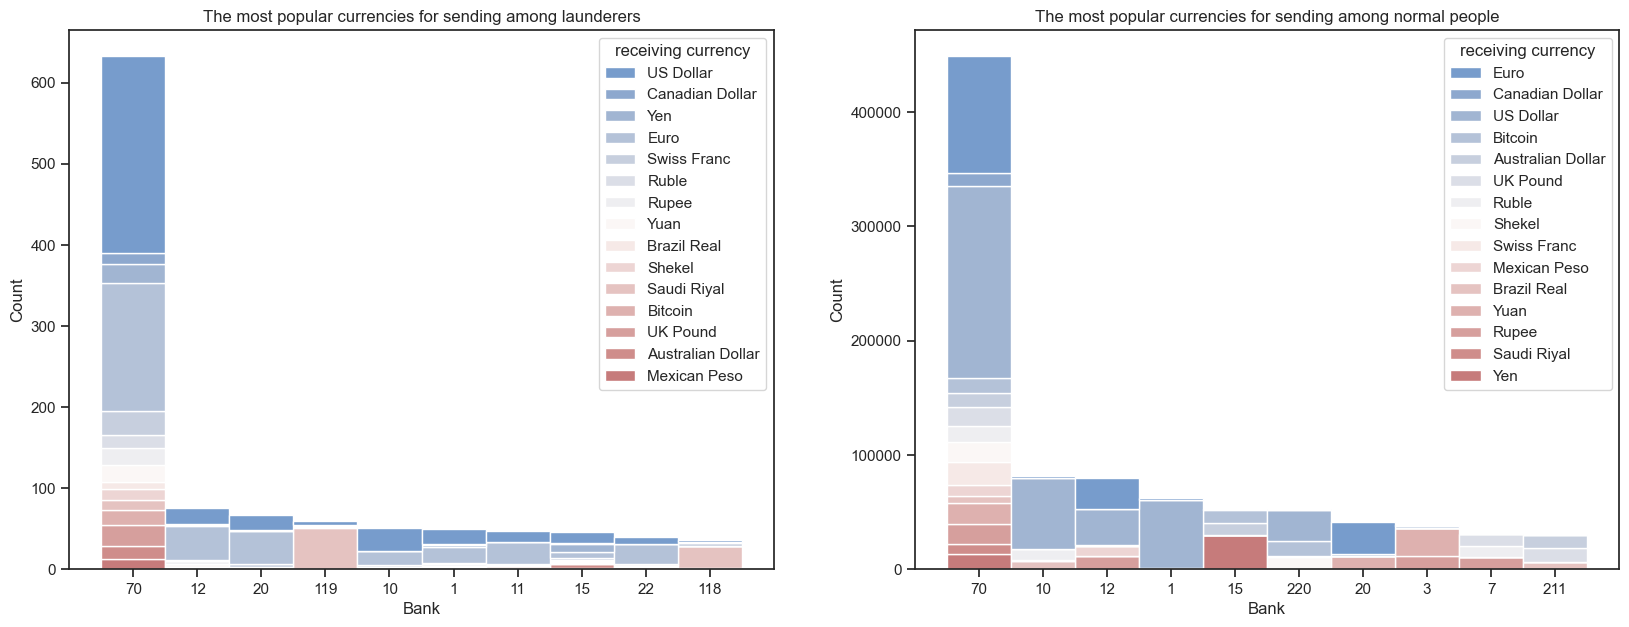

In [57]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.histplot(data=from_Ldf, x='from bank', hue='receiving currency', multiple='stack', palette='vlag')
plt.xlabel('Bank')
plt.title('The most popular currencies for sending among launderers')
plt.subplot(1, 2, 2)
sns.histplot(data=from_Ndf, x='from bank', hue='receiving currency', multiple='stack', palette='vlag')
plt.xlabel('Bank')
plt.title('The most popular currencies for sending among normal people')
plt.show()

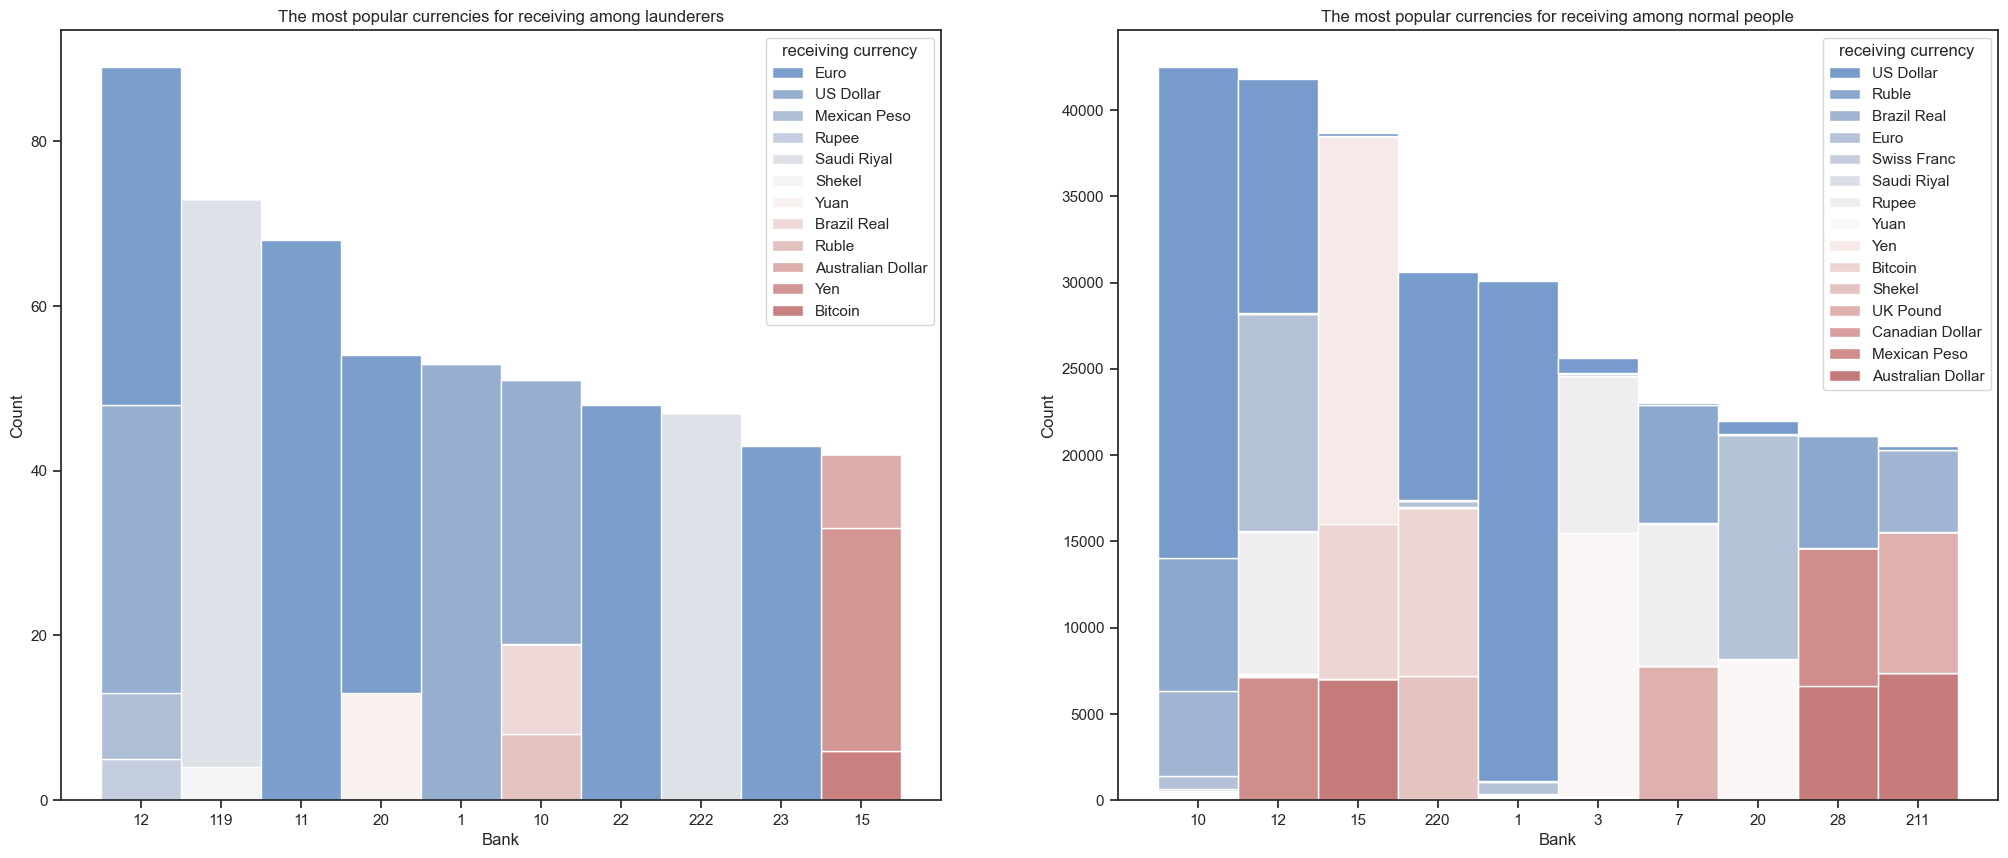

In [58]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.histplot(data=to_Ldf, x='to bank', hue='receiving currency', multiple='stack', palette='vlag')
plt.xlabel('Bank')
plt.title('The most popular currencies for receiving among launderers')
plt.subplot(1, 2, 2)
sns.histplot(data=to_Ndf, x='to bank', hue='receiving currency', multiple='stack', palette='vlag')
plt.xlabel('Bank')
plt.title('The most popular currencies for receiving among normal people')
plt.show()

In [59]:
large_amount_norm = pd.DataFrame(from_Ndf.groupby('from bank')['received_in_usd'].agg('sum').sort_values(ascending=False)).reset_index()
large_amount_laun = pd.DataFrame(from_Ldf.groupby('from bank')['received_in_usd'].agg('sum').sort_values(ascending=False)).reset_index()

In [60]:
large_amount_norm_to = pd.DataFrame(to_Ndf.groupby('to bank')['received_in_usd'].agg('sum').sort_values(ascending=False)).reset_index()
large_amount_laun_to = pd.DataFrame(to_Ldf.groupby('to bank')['received_in_usd'].agg('sum').sort_values(ascending=False)).reset_index()

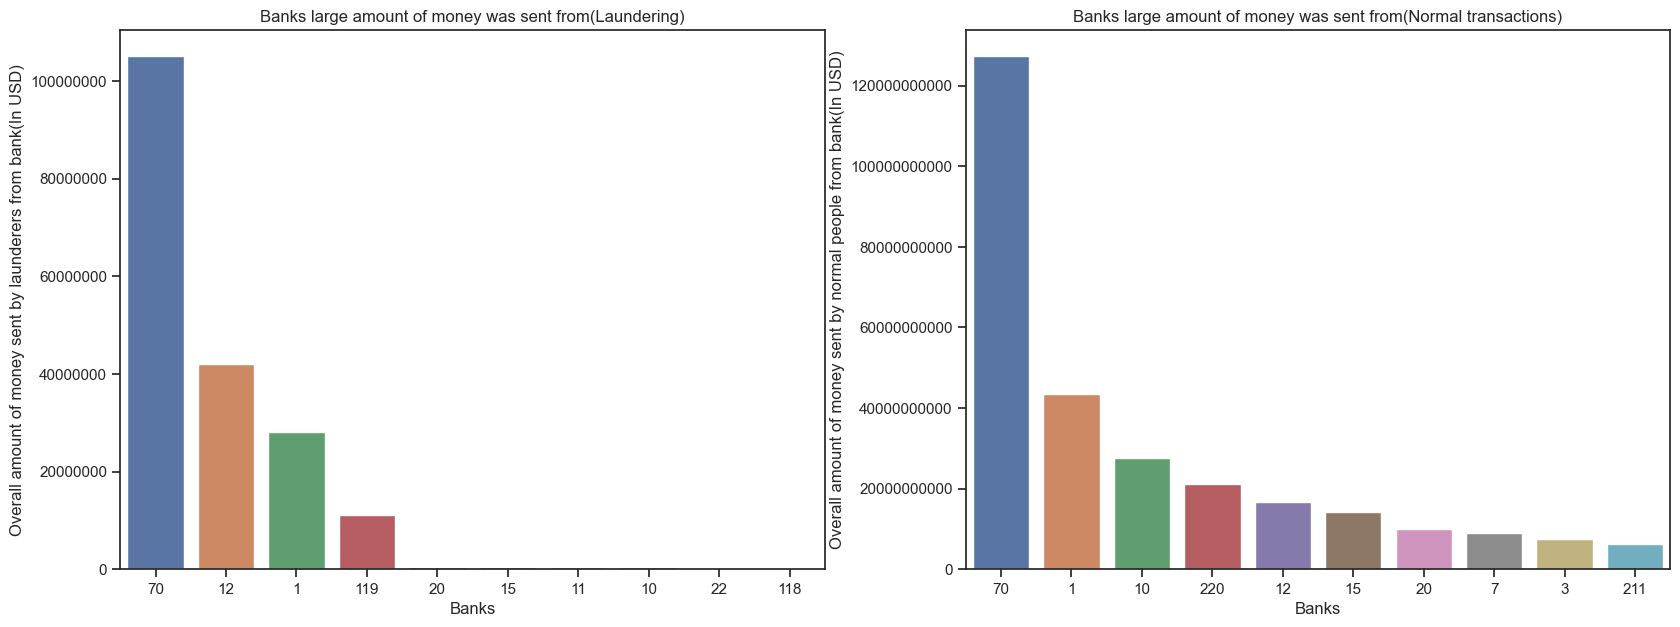

In [61]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(data=large_amount_laun, x='from bank', y='received_in_usd')
plt.xlabel('Banks')
plt.ylabel('Overall amount of money sent by launderers from bank(In USD)')
plt.title('Banks large amount of money was sent from(Laundering)')
plt.subplot(1, 2, 2)
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(data=large_amount_norm, x='from bank', y='received_in_usd')
plt.xlabel('Banks')
plt.ylabel('Overall amount of money sent by normal people from bank(In USD)')
plt.title('Banks large amount of money was sent from(Normal transactions)')
plt.show()

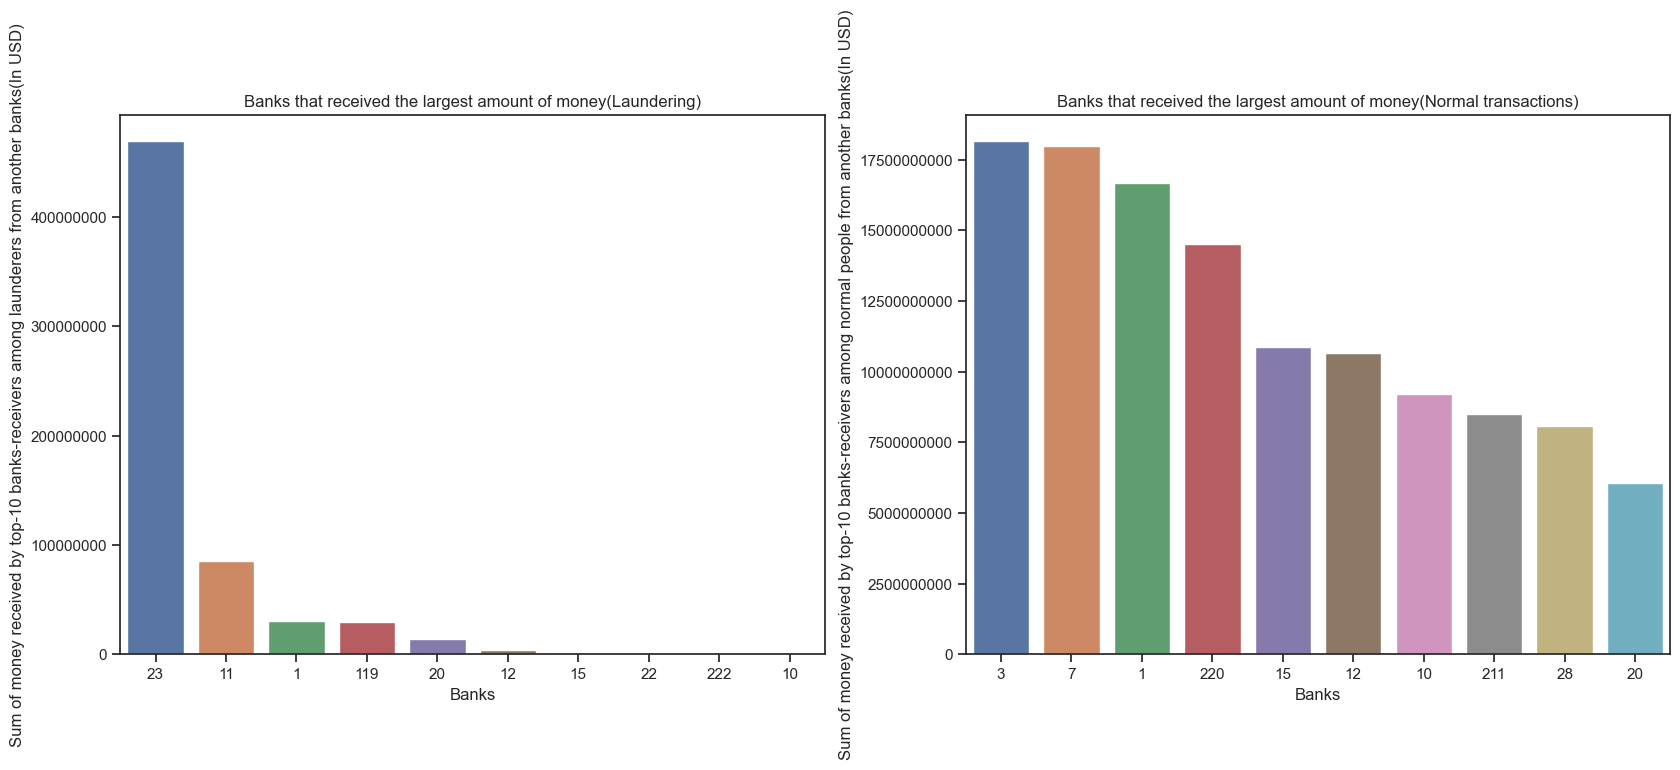

In [62]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(data=large_amount_laun_to, x='to bank', y='received_in_usd')
plt.xlabel('Banks')
plt.ylabel('Sum of money received by top-10 banks-receivers among launderers from another banks(In USD)')
plt.title('Banks that received the largest amount of money(Laundering)')
plt.subplot(1, 2, 2)
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(data=large_amount_norm_to, x='to bank', y='received_in_usd')
plt.xlabel('Banks')
plt.ylabel('Sum of money received by top-10 banks-receivers among normal people from another banks(In USD)')
plt.title('Banks that received the largest amount of money(Normal transactions)')
plt.show()

In [63]:
top_10_acc_overall_senders = df['account'].value_counts()[:10]
top_10_acc_laun_senders = only_laun['account'].value_counts()[:10]

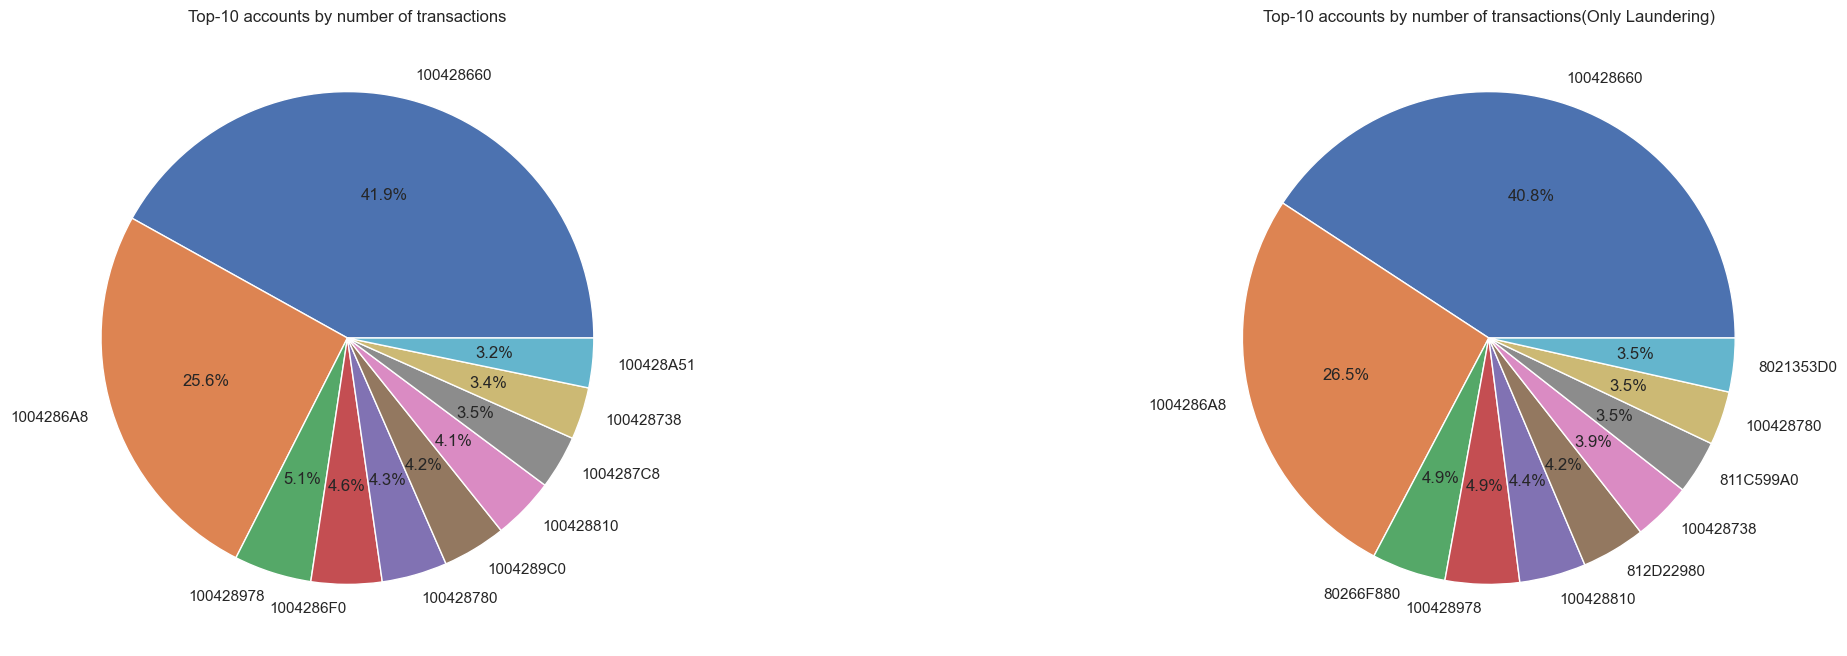

In [64]:
plt.figure(figsize=(27, 8))
plt.subplot(1, 2, 1)
plt.pie(top_10_acc_overall_senders.values, labels=top_10_acc_overall_senders.keys(), autopct='%1.1f%%')
plt.title('Top-10 accounts by number of transactions')
plt.subplot(1, 2, 2)
plt.pie(top_10_acc_laun_senders.values, labels=top_10_acc_laun_senders.keys(), autopct='%1.1f%%')
plt.title('Top-10 accounts by number of transactions(Only Laundering)')
plt.show()

## Insights
* The most popular payment format for receiving laundering is ACH
* The origin of most launderings is 70th bank. The main reason of that is that it's the most popular bank in general
* It's important to pay attention to most popular banks-receivers of launderings because most of them are different from bank that are popular among normal people
* A big part of launderings are received in US dollars and Euro. But we should also pay attention to Saudi Riyal because among launderers it's pretty common as well
* The most popular bank among launderers is 12th, according to charts, 23rd bank got the most of money, so conclusion is that large sums are sent to 23rd bank.
* One more interesting thing is that the accounts that have more normal taransactions, have more laundering transactions. Most likely it's some big businesses, that sometimes break the laws